# Implementation will feature pyCombinatorial 

In [7]:
pip install pyCombinatorial

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyCombinatorial.utils import graphs, util
from scipy.spatial.distance import cdist
import os

# algorithm
from pyCombinatorial.algorithm import simulated_annealing_tsp

In [9]:
def generate_cities(n, seed=42):
    np.random.seed(seed)
    return np.random.uniform(0, 500, size=(n, 2))

def display_distance_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.round(2))
    
def create_distance_matrix(cities):
    return cdist(cities, cities, metric='euclidean')

In [10]:
cities = generate_cities(20)
dist_matrix = create_distance_matrix(cities)
pd.DataFrame(dist_matrix).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,250.86,412.11,163.78,165.99,177.24,434.42,395.57,215.86,330.99,422.61,295.07,92.26,235.10,465.07,407.12,154.75,303.99,427.95,298.57
1,250.86,0.00,363.21,362.53,85.29,401.23,199.58,344.65,217.04,214.79,237.31,248.71,166.53,269.49,284.79,222.93,376.65,156.98,329.26,82.77
2,412.11,363.21,0.00,358.45,354.58,412.55,339.38,18.82,198.72,153.64,228.07,125.28,348.53,180.45,224.97,225.88,399.05,519.88,79.82,299.90
3,163.78,362.53,358.45,0.00,282.79,55.15,506.74,346.95,210.45,342.91,456.82,275.95,203.07,189.68,489.25,443.24,41.50,454.69,403.54,378.67
4,165.99,85.29,354.58,282.79,0.00,318.42,273.53,335.81,174.46,224.93,284.34,230.34,82.13,222.89,330.84,268.79,293.83,189.04,339.30,140.26
5,177.24,401.23,412.55,55.15,318.42,0.00,555.21,401.43,263.92,396.81,509.70,330.91,236.52,244.80,543.09,495.87,24.59,479.37,458.66,424.58
6,434.42,199.58,339.38,506.74,273.53,555.21,0.00,325.63,306.84,204.10,116.15,280.91,342.71,350.55,145.89,114.38,531.83,305.38,270.07,135.89
7,395.57,344.65,18.82,346.95,335.81,401.43,325.63,0.00,181.32,136.19,216.13,106.82,330.66,165.66,216.41,212.96,387.17,501.24,74.88,282.11
8,215.86,217.04,198.72,210.45,174.46,263.92,306.84,181.32,0.00,133.08,246.50,79.43,150.72,52.55,279.20,233.17,243.46,359.82,213.54,194.65
9,330.99,214.79,153.64,342.91,224.93,396.81,204.10,136.19,133.08,0.00,117.68,79.36,247.27,161.00,146.34,106.54,376.54,371.58,115.84,146.48


In [6]:
# This implementation thus far is for undirected TSP as dist_matrix[i][j] == dist_matrix[j][i])
# Later on I might make it an asymmetric distance matrix, as in dist_matrix[i][j] ≠ dist_matrix[j][i]

# Simulated Annealing (Accurate)

In [4]:
def run_simulated_annealing(city_size, verbose=True):
    cities = generate_cities(city_size, seed=42)
    dist_matrix = create_distance_matrix(cities)
    
    # SA Parameters
    parameters = {
        'initial_temperature': 1000.0, 
        'temperature_iterations': 100, 
        'final_temperature': 0.0001,
        'alpha': 0.99,
        'verbose': verbose
    }
    
    # Run SA and measure time
    start_time = time.time()
    route, distance = simulated_annealing_tsp(dist_matrix, **parameters)
    runtime = (time.time() - start_time) * 1000  # Convert to ms
    
    return distance, runtime, route

In [ ]:
# Parameters and format was taken from pyCombinatorial documentation

In [5]:
# path
sa_results_file = "sa_results.csv"
# amount of samples to be ran
num_samples = 5
# city size to be tested
sa_sizes = [6]

if os.path.exists(sa_results_file):
    sa_df = pd.read_csv(sa_results_file)
    if 'samples' not in sa_df.columns:
        sa_df['samples'] = 1 
    print("Resuming from saved file...")
else:
    sa_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'samples'])
    print("Starting new benchmark...")

for size in sa_sizes:
    print(f"\nProcessing {size} cities ({num_samples} samples)...")
    
    # arrays for runtime and distance
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        try:
            cities = generate_cities(size, seed=42)
            dist_matrix = create_distance_matrix(cities)
            
            start = time.time()
            distance, runtime, route = run_simulated_annealing(size, verbose=False)
            runtime = (time.time() - start) * 1000  # ms
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes:  
        avg_runtime = round(np.mean(runtimes), 2)
        avg_distance = round(np.mean(distances), 2)
        
        # Check if results exists
        existing = sa_df[sa_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + len(runtimes)
            new_runtime = round((old_runtime * old_samples + avg_runtime * len(runtimes)) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * len(runtimes)) / total_samples, 2)
            
            sa_df.loc[sa_df['cities'] == size, ['runtime_ms', 'distance', 'samples']] = [
                new_runtime, new_distance, total_samples
            ]
        else:
            # New entry
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'samples': len(runtimes)
            }])
            sa_df = pd.concat([sa_df, new_row], ignore_index=True)
        
        # Save with 2dp
        sa_df['distance'] = sa_df['distance'].apply(lambda x: round(float(x), 2))
        sa_df['runtime_ms'] = sa_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        sa_df.to_csv(sa_results_file, index=False, float_format='%.2f')
        
        if len(runtimes) > 1:
            dist_std = round(np.std(distances), 2)
            time_std = round(np.std(runtimes), 2)
            print(f"Stats for {size} cities:")
            print(f"Distance std: ±{dist_std:.2f} | Runtime std: ±{time_std:.2f} ms")

# Output
sa_df['distance'] = sa_df['distance'].map('{:.2f}'.format)
sa_df['runtime_ms'] = sa_df['runtime_ms'].map('{:.2f}'.format)
print("\nCompleted Final results:")
print(sa_df[['cities', 'distance', 'runtime_ms', 'samples']])

Resuming from saved file...

Processing 6 cities (5 samples)...
Sample 1: 100979.58 ms | Distance: 1205.34
Sample 2: 100591.84 ms | Distance: 1205.34
Sample 3: 131008.17 ms | Distance: 1205.34
Sample 4: 100592.11 ms | Distance: 1205.34
Sample 5: 99421.14 ms | Distance: 1205.34
Stats for 6 cities:
Distance std: ±0.00 | Runtime std: ±12255.97 ms

Benchmark complete! Final results:
   cities distance runtime_ms  samples
0       4  1136.30   40680.15        6
1       8  1386.16  305780.51        1
2      12  1486.25  919774.24        1
3       6  1205.34  106518.57        5


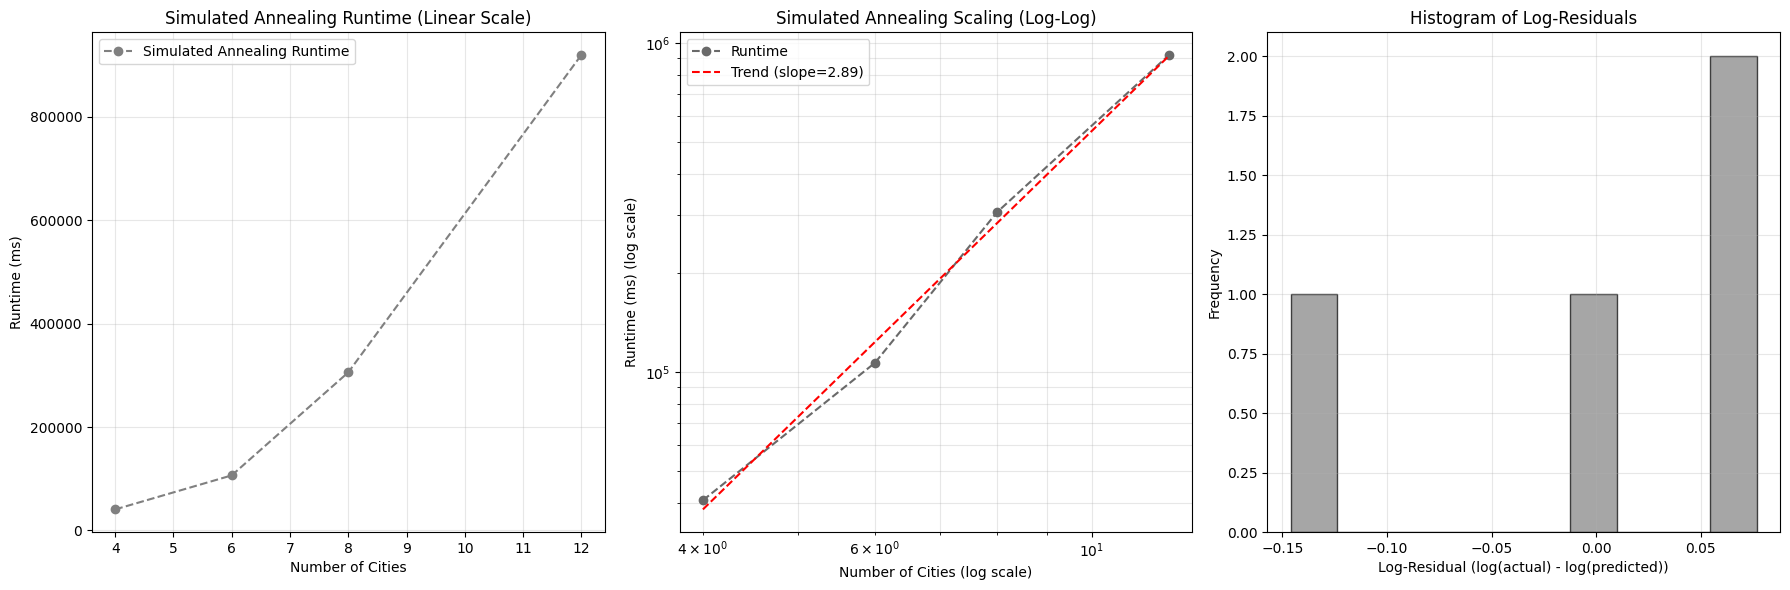

Estimated complexity exponent: 2.89
This suggests quadratic to cubic scaling


In [19]:
# File path
sa_results_file = "sa_results.csv"

# Load results
if os.path.exists(sa_results_file):
    df = pd.read_csv(sa_results_file)

    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0]

    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    residuals = log_runtime - predicted_log_runtime

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.plot(df['cities'], df['runtime_ms'],
             marker='o', linestyle='--',
             color='gray', label='Simulated Annealing Runtime')
    ax1.set_title('Simulated Annealing Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], df['runtime_ms'],
               marker='o', linestyle='--',
               color='dimgray', label='Runtime')
    ax2.loglog(df['cities'], trend,
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')
    ax2.set_title('Simulated Annealing Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    ax3.hist(residuals, bins=10, color='gray', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 3.5:
        print("This suggests inefficient or worse-than-expected scaling")
    elif coeffs[0] > 2.0:
        print("This suggests quadratic to cubic scaling")
    elif coeffs[0] > 1.0:
        print("This suggests linear to quadratic scaling")
    else:
        print("This suggests highly efficient (near-linear) performance")

else:
    print("Saved results found.")

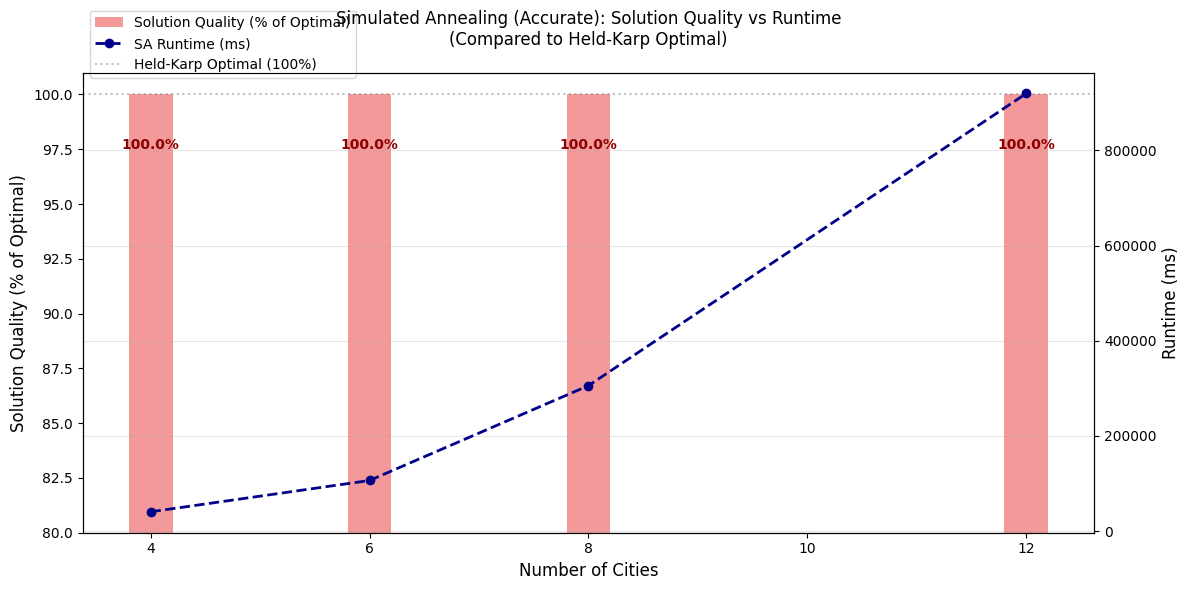

In [7]:
sa_results_file = "sa_results.csv"
hk_file = "held_karp_results.csv"

if os.path.exists(sa_results_file) and os.path.exists(hk_file):
    sa_df = pd.read_csv(sa_results_file).sort_values('cities')
    hk_df = pd.read_csv(hk_file).sort_values('cities')
    
    merged_df = pd.merge(sa_df, hk_df, on='cities', suffixes=('_sa', '_hk'))
    
    merged_df['optimality_pct'] = (merged_df['distance_hk'] / merged_df['distance_sa']) * 100
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    bars = ax1.bar(merged_df['cities'],
                   merged_df['optimality_pct'],
                   width=0.4,
                   color='lightcoral',
                   alpha=0.8,
                   label='Solution Quality (% of Optimal)')
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2., height - 2,
                 f'{height:.1f}%',
                 ha='center', va='top',
                 color='darkred', fontsize=10, fontweight='bold')
    
    ax2 = ax1.twinx()
    line, = ax2.plot(merged_df['cities'], merged_df['runtime_ms_sa'],
                     marker='o', linestyle='--',
                     color='darkblue', linewidth=2,
                     label='SA Runtime (ms)')
    
    ax1.set_xlabel('Number of Cities', fontsize=12)
    ax1.set_ylabel('Solution Quality (% of Optimal)', fontsize=12)
    ax1.set_ylim(80, 101)
    ax2.set_ylabel('Runtime (ms)', fontsize=12)
    
    ax1.axhline(100, color='gray', linestyle=':', alpha=0.5, label='Held-Karp Optimal (100%)')
    
    lines = [bars, line, ax1.lines[-1]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.15))
    
    plt.title('Simulated Annealing (Accurate): Solution Quality vs Runtime\n(Compared to Held-Karp Optimal)', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif not os.path.exists(sa_results_file):
    print("Not found.")
else:
    print("Held-Karp missing")

In [ ]:
# Due to the limited data used, there is a lack of use for this for some of the graphs created.

# Simulated Annealing (Balanced)

In [8]:
def run_simulated_annealing(city_size, verbose=True):
    cities = generate_cities(city_size, seed=42)
    dist_matrix = create_distance_matrix(cities)
    
    parameters = {
    'initial_temperature': 500.0,      
    'temperature_iterations': 50,   
    'final_temperature': 0.001, 
    'alpha': 0.95,  
    'verbose': verbose
    }
    
    start_time = time.time()
    route, distance = simulated_annealing_tsp(dist_matrix, **parameters)
    runtime = (time.time() - start_time) * 1000  # Convert to ms
    
    return distance, runtime, route

In [11]:
sa_results_file = "sa_balanced_results.csv"
num_samples = 1
sa_sizes = [4]

if os.path.exists(sa_results_file):
    sa_df = pd.read_csv(sa_results_file)
    if 'samples' not in sa_df.columns:
        sa_df['samples'] = 1 
    print("Resuming...")
else:
    sa_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'samples'])
    print("Starting benchmark...")

for size in sa_sizes:
    print(f"\nProcessing {size} cities ({num_samples} samples)...")
    
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        try:
            cities = generate_cities(size, seed=42)
            dist_matrix = create_distance_matrix(cities)
            
            start = time.time()
            distance, runtime, route = run_simulated_annealing(size, verbose=False)
            runtime = (time.time() - start) * 1000 
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes: 
        avg_runtime = round(np.mean(runtimes), 2)
        avg_distance = round(np.mean(distances), 2)
        
        existing = sa_df[sa_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + len(runtimes)
            new_runtime = round((old_runtime * old_samples + avg_runtime * len(runtimes)) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * len(runtimes)) / total_samples, 2)
            
            sa_df.loc[sa_df['cities'] == size, ['runtime_ms', 'distance', 'samples']] = [
                new_runtime, new_distance, total_samples
            ]
        else:
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'samples': len(runtimes)
            }])
            sa_df = pd.concat([sa_df, new_row], ignore_index=True)
        
        sa_df['distance'] = sa_df['distance'].apply(lambda x: round(float(x), 2))
        sa_df['runtime_ms'] = sa_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        sa_df.to_csv(sa_results_file, index=False, float_format='%.2f')
        
        if len(runtimes) > 1:
            dist_std = round(np.std(distances), 2)
            time_std = round(np.std(runtimes), 2)
            print(f"Stats for {size} cities:")
            print(f"Distance std: ±{dist_std:.2f} | Runtime std: ±{time_std:.2f} ms")

sa_df['distance'] = sa_df['distance'].map('{:.2f}'.format)
sa_df['runtime_ms'] = sa_df['runtime_ms'].map('{:.2f}'.format)
print("\nBenchmark complete! Final results:")
print(sa_df[['cities', 'distance', 'runtime_ms', 'samples']])

Resuming from saved file...

Processing 17 cities (1 samples)...
Sample 1: 155823.15 ms | Distance: 1610.33

Processing 18 cities (1 samples)...
Sample 1: 185172.37 ms | Distance: 1871.05

Processing 19 cities (1 samples)...
Sample 1: 214329.23 ms | Distance: 1913.07

Benchmark complete! Final results:
    cities distance runtime_ms  samples
0        4  1136.30    3634.44        6
1        8  1386.16   18654.16        6
2       12  1486.25   65635.70        1
3       16  1608.22  157121.03        1
4       20  1932.15  292601.91        1
5        5  1136.73    5683.80        1
6        6  1205.34    8563.21        1
7        7  1381.09   12283.37        1
8        9  1433.24   25928.58        1
9       10  1451.53   35097.66        1
10      11  1481.27   46324.74        1
11      13  1494.66   73598.02        1
12      14  1526.43   88634.03        1
13      15  1602.63  109450.46        1
14      17  1610.33  155823.15        1
15      18  1871.05  185172.37        1
16      19  1913

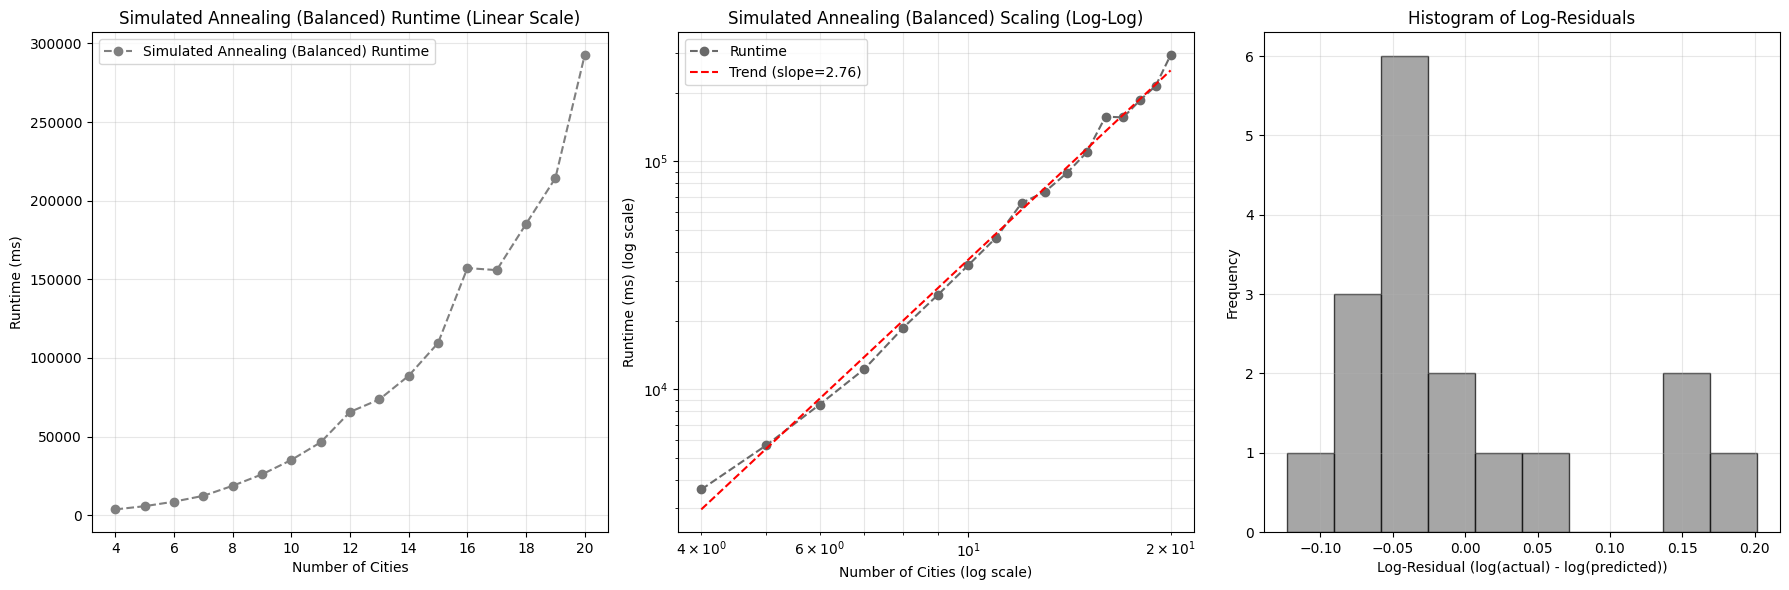

Estimated complexity exponent: 2.76
This suggests quadratic to cubic scaling


In [20]:
sa_results_file = "sa_balanced_results.csv"

if os.path.exists(sa_results_file):
    df = pd.read_csv(sa_results_file)

    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0]

    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    residuals = log_runtime - predicted_log_runtime

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ax1.plot(df['cities'], df['runtime_ms'],
             marker='o', linestyle='--',
             color='gray', label='Simulated Annealing (Balanced) Runtime')
    ax1.set_title('Simulated Annealing (Balanced) Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], df['runtime_ms'],
               marker='o', linestyle='--',
               color='dimgray', label='Runtime')
    ax2.loglog(df['cities'], trend,
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')
    ax2.set_title('Simulated Annealing (Balanced) Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    ax3.hist(residuals, bins=10, color='gray', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 3.5:
        print("This suggests inefficient or worse-than-expected scaling")
    elif coeffs[0] > 2.0:
        print("This suggests quadratic to cubic scaling")
    elif coeffs[0] > 1.0:
        print("This suggests linear to quadratic scaling")
    else:
        print("This suggests highly efficient (near-linear) performance")

else:
    print("No saved results found.")

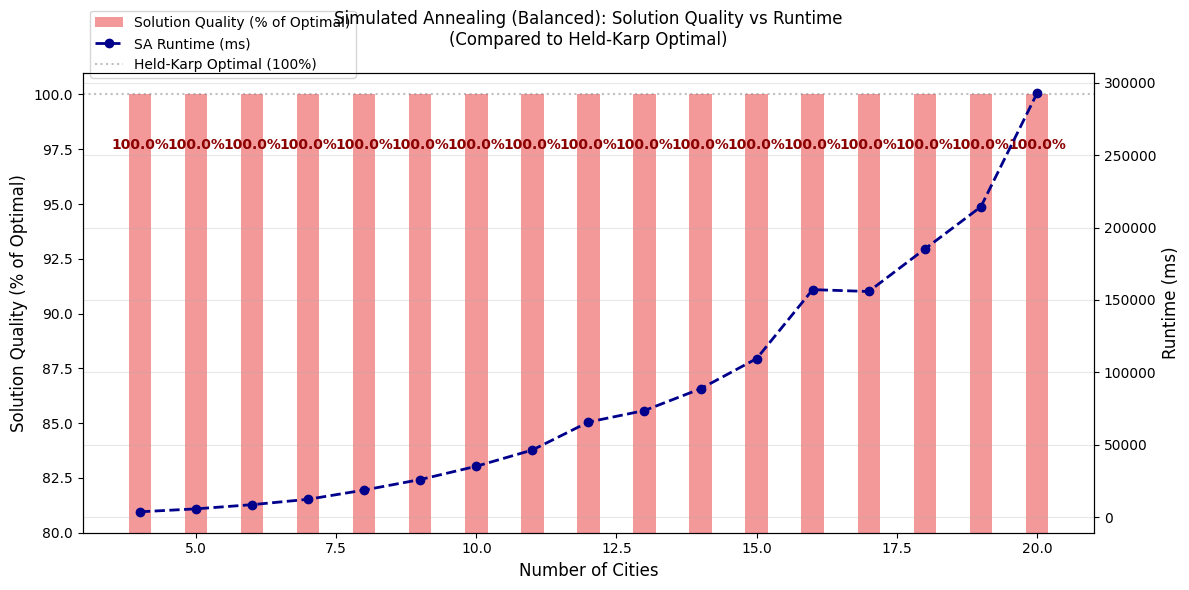

In [5]:
sa_results_file = "sa_balanced_results.csv"
hk_file = "held_karp_results.csv"

if os.path.exists(sa_results_file) and os.path.exists(hk_file):
    sa_df = pd.read_csv(sa_results_file).sort_values('cities')
    hk_df = pd.read_csv(hk_file).sort_values('cities')
    
    merged_df = pd.merge(sa_df, hk_df, on='cities', suffixes=('_sa', '_hk'))
    
    merged_df['optimality_pct'] = (merged_df['distance_hk'] / merged_df['distance_sa']) * 100
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    bars = ax1.bar(merged_df['cities'],
                   merged_df['optimality_pct'],
                   width=0.4,
                   color='lightcoral',
                   alpha=0.8,
                   label='Solution Quality (% of Optimal)')
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2., height - 2,
                 f'{height:.1f}%',
                 ha='center', va='top',
                 color='darkred', fontsize=10, fontweight='bold')
    
    ax2 = ax1.twinx()
    line, = ax2.plot(merged_df['cities'], merged_df['runtime_ms_sa'],
                     marker='o', linestyle='--',
                     color='darkblue', linewidth=2,
                     label='SA Runtime (ms)')
    
    ax1.set_xlabel('Number of Cities', fontsize=12)
    ax1.set_ylabel('Solution Quality (% of Optimal)', fontsize=12)
    ax1.set_ylim(80, 101)
    ax2.set_ylabel('Runtime (ms)', fontsize=12)
    
    ax1.axhline(100, color='gray', linestyle=':', alpha=0.5, label='Held-Karp Optimal (100%)')
    
    lines = [bars, line, ax1.lines[-1]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.15))
    
    plt.title('Simulated Annealing (Balanced): Solution Quality vs Runtime\n(Compared to Held-Karp Optimal)', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif not os.path.exists(sa_results_file):
    print("Not found")
else:
    print("Held-Karp missing")

# Simulated Annealing (Quick)

In [6]:
# simulated annealing and parameters - quick variation so its faster with hopefully accurate results
def run_simulated_annealing(city_size, verbose=True):
    cities = generate_cities(city_size, seed=42)
    dist_matrix = create_distance_matrix(cities)
    
    parameters = {
    'initial_temperature': 200.0,      
    'temperature_iterations': 20, 
    'final_temperature': 0.01,  
    'alpha': 0.85,  
    'verbose': verbose
    }
    
    start_time = time.time()
    route, distance = simulated_annealing_tsp(dist_matrix, **parameters)
    runtime = (time.time() - start_time) * 1000  # ms
    
    return distance, runtime, route

In [21]:
# path
sa_results_file = "sa_quick_results.csv"
# samples
num_samples = 1
# city size being tested
sa_sizes = [4]

# load results
if os.path.exists(sa_results_file):
    sa_df = pd.read_csv(sa_results_file)
    if 'samples' not in sa_df.columns:
        sa_df['samples'] = 1 
    print("Resuming from saved file...")
else:
    sa_df = pd.DataFrame(columns=['cities', 'distance', 'runtime_ms', 'samples'])
    print("Starting new benchmark...")

for size in sa_sizes:
    print(f"\nProcessing {size} cities ({num_samples} samples)...")
    
    # arrays for runtime and distances
    runtimes = []
    distances = []
    
    for sample in range(num_samples):
        try:
            cities = generate_cities(size, seed=42)
            dist_matrix = create_distance_matrix(cities)
            
            start = time.time()
            distance, runtime, route = run_simulated_annealing(size, verbose=False)
            runtime = (time.time() - start) * 1000
            
            runtimes.append(runtime)
            distances.append(distance)
            
            print(f"Sample {sample+1}: {runtime:.2f} ms | Distance: {distance:.2f}")
            
        except Exception as e:
            print(f"Error in sample {sample+1}: {e}")
            continue
    
    if runtimes: 
        avg_runtime = round(np.mean(runtimes), 2)
        avg_distance = round(np.mean(distances), 2)
        
        existing = sa_df[sa_df['cities'] == size]
        
        if not existing.empty:
            old_samples = existing['samples'].values[0]
            old_runtime = existing['runtime_ms'].values[0]
            old_distance = existing['distance'].values[0]
            
            total_samples = old_samples + len(runtimes)
            new_runtime = round((old_runtime * old_samples + avg_runtime * len(runtimes)) / total_samples, 2)
            new_distance = round((old_distance * old_samples + avg_distance * len(runtimes)) / total_samples, 2)
            
            sa_df.loc[sa_df['cities'] == size, ['runtime_ms', 'distance', 'samples']] = [
                new_runtime, new_distance, total_samples
            ]
        else:
            new_row = pd.DataFrame([{
                'cities': size,
                'distance': avg_distance,
                'runtime_ms': avg_runtime,
                'samples': len(runtimes)
            }])
            sa_df = pd.concat([sa_df, new_row], ignore_index=True)
        
        # Save with 2dp
        sa_df['distance'] = sa_df['distance'].apply(lambda x: round(float(x), 2))
        sa_df['runtime_ms'] = sa_df['runtime_ms'].apply(lambda x: round(float(x), 2))
        sa_df.to_csv(sa_results_file, index=False, float_format='%.2f')
        
        if len(runtimes) > 1:
            dist_std = round(np.std(distances), 2)
            time_std = round(np.std(runtimes), 2)
            print(f"Stats for {size} cities:")
            print(f"Distance std: ±{dist_std:.2f} | Runtime std: ±{time_std:.2f} ms")

# Output
sa_df['distance'] = sa_df['distance'].map('{:.2f}'.format)
sa_df['runtime_ms'] = sa_df['runtime_ms'].map('{:.2f}'.format)
print("\nBenchmark complete - Final results:")
print(sa_df[['cities', 'distance', 'runtime_ms', 'samples']])

Resuming from saved file...

Processing 4 cities (1 samples)...
Sample 1: 365.42 ms | Distance: 1136.30

Benchmark complete - Final results:
    cities distance   runtime_ms  samples
0        4  1136.30       414.41        7
1        8  1386.16      2049.01        6
2       12  1486.25      6033.50        6
3       16  1608.22     13938.31       11
4       20  1932.15     24328.23        6
5       24  2033.59     49212.69        1
6       28  2178.64     73398.07        1
7       32  2290.77    108510.87        1
8       36  2313.43    140017.94        1
9       40  2448.66    190337.67        1
10      23  2025.73     35048.31        6
11      25  2036.54     48675.23        1
12      30  2258.84     83846.86        1
13      35  2310.64    127729.71        1
14      21  1970.68     26597.05        5
15      22  1971.21     33028.41        5
16      15  1602.63     10498.50        5
17      17  1610.33     14561.66        5
18      18  1871.05     17090.39        5
19      19  1913.07

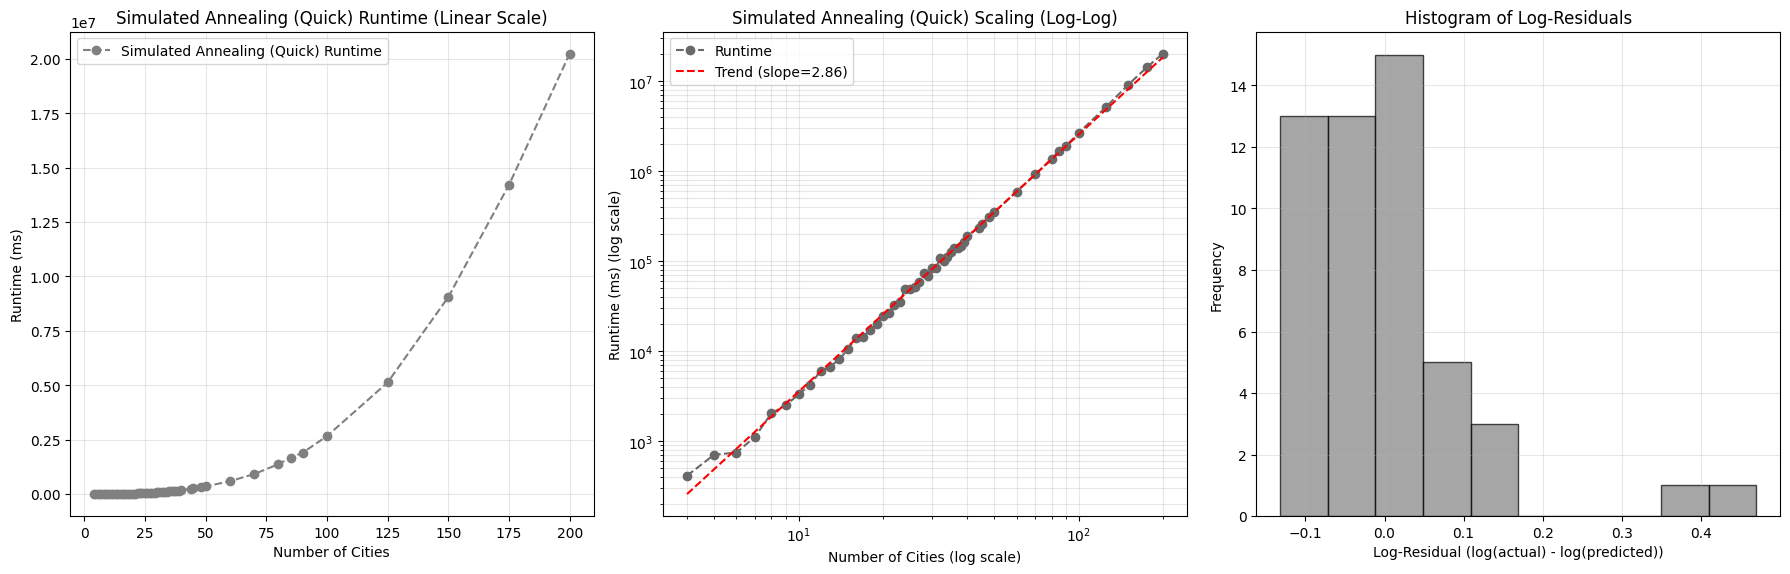

Estimated complexity exponent: 2.86
This suggests quadratic to cubic scaling


In [22]:
# File path
sa_results_file = "sa_quick_results.csv"

# Load results
if os.path.exists(sa_results_file):
    df = pd.read_csv(sa_results_file)

    # Filter values
    df = df.sort_values(by='cities')
    df = df[df['runtime_ms'] > 0]

    log_cities = np.log(df['cities'])
    log_runtime = np.log(df['runtime_ms'])

    # trendline
    coeffs = np.polyfit(log_cities, log_runtime, 1)
    predicted_log_runtime = np.polyval(coeffs, log_cities)
    residuals = log_runtime - predicted_log_runtime

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Linear runtime plot (Left)
    ax1.plot(df['cities'], df['runtime_ms'],
             marker='o', linestyle='--',
             color='gray', label='Simulated Annealing (Quick) Runtime')
    ax1.set_title('Simulated Annealing (Quick) Runtime (Linear Scale)')
    ax1.set_xlabel('Number of Cities')
    ax1.set_ylabel('Runtime (ms)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Log scale plot and trendline (right)
    trend = np.exp(coeffs[1]) * (df['cities'] ** coeffs[0])
    ax2.loglog(df['cities'], df['runtime_ms'],
               marker='o', linestyle='--',
               color='dimgray', label='Runtime')
    ax2.loglog(df['cities'], trend,
               'r--', label=f'Trend (slope={coeffs[0]:.2f})')
    ax2.set_title('Simulated Annealing (Quick) Scaling (Log-Log)')
    ax2.set_xlabel('Number of Cities (log scale)')
    ax2.set_ylabel('Runtime (ms) (log scale)')
    ax2.grid(True, which='both', alpha=0.3)
    ax2.legend()

    # Histogram of residuals (right)
    ax3.hist(residuals, bins=10, color='gray', edgecolor='black', alpha=0.7)
    ax3.set_title('Histogram of Log-Residuals')
    ax3.set_xlabel('Log-Residual (log(actual) - log(predicted))')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Estimated complexity exponent: {coeffs[0]:.2f}")
    if coeffs[0] > 3.5:
        print("This suggests inefficient or worse-than-expected scaling")
    elif coeffs[0] > 2.0:
        print("This suggests quadratic to cubic scaling")
    elif coeffs[0] > 1.0:
        print("This suggests linear to quadratic scaling")
    else:
        print("This suggests highly efficient (near-linear) performance")

else:
    print("No saved results found.")

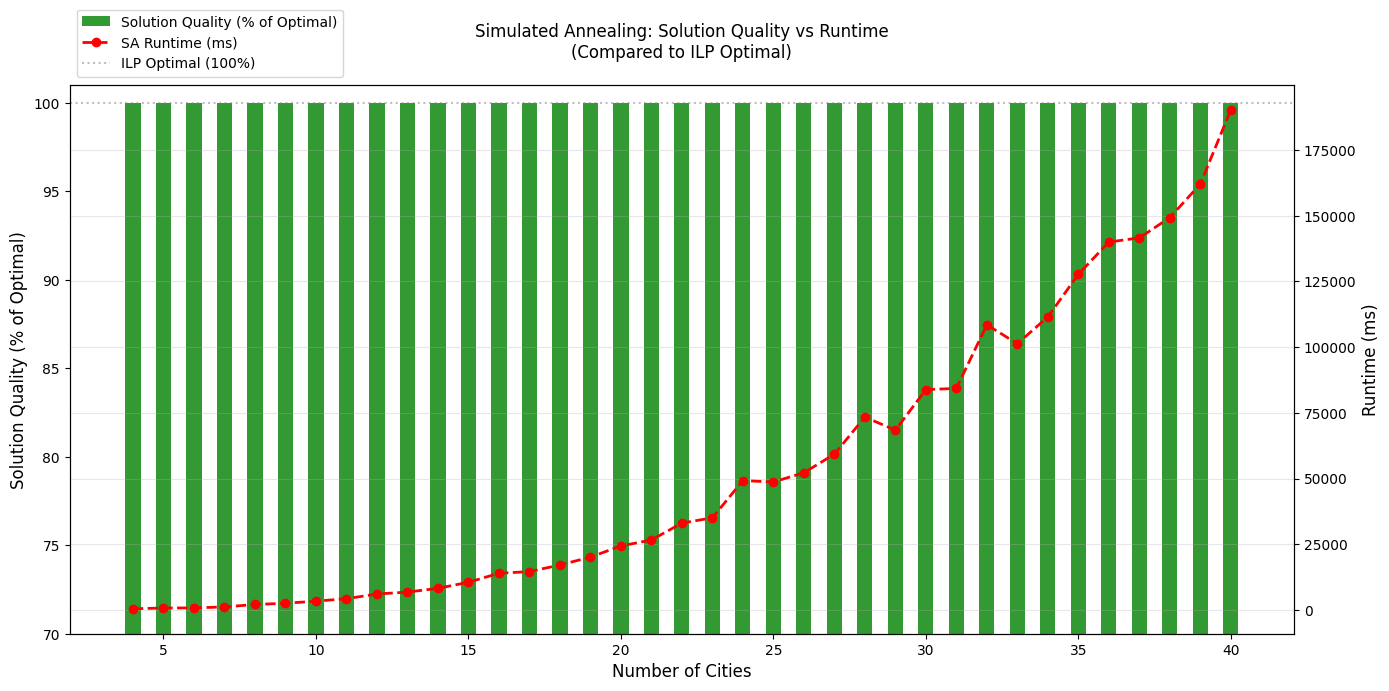

In [23]:
# libs
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# paths
sa_file = "sa_quick_results.csv"
ilp_file = "ilp_results.csv"

if os.path.exists(sa_file) and os.path.exists(ilp_file):
    sa_df = pd.read_csv(sa_file).sort_values('cities')
    ilp_df = pd.read_csv(ilp_file).sort_values('cities')
    
    # Merge datasets
    merged_df = pd.merge(sa_df, ilp_df, on='cities', suffixes=('_sa', '_ilp'))
    
    # 100 * (optimal / actual)
    merged_df['optimality_pct'] = (merged_df['distance_ilp'] / merged_df['distance_sa']) * 100
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Colour array and format labels
    colors = []
    display_values = []
    for pct in merged_df['optimality_pct']:
        if pct == 100:
            colors.append('green')
            display_values.append('')
        elif pct >= 99.9:
            colors.append('skyblue')
            display_values.append('99.9%')
        else:
            colors.append('skyblue')
            display_values.append(f'{pct:.1f}%')
    
    # Bar graph
    bar_width = 0.5
    bars = ax1.bar(merged_df['cities'],
                   merged_df['optimality_pct'],
                   width=bar_width,
                   color=colors,
                   alpha=0.8,
                   label='Solution Quality (% of Optimal)')
    
    heights = [bar.get_height() for bar in bars]
    
    for i, bar in enumerate(bars):
        if display_values[i]: 
            y_offset = -4  #  offset
            
            if i > 0 and abs(heights[i] - heights[i-1]) < 5:
                y_offset = -8 if heights[i] > heights[i-1] else -2
            if i < len(bars)-1 and abs(heights[i] - heights[i+1]) < 5:
                y_offset = -8 if heights[i] > heights[i+1] else -2
                
            ax1.text(bar.get_x() + bar.get_width() / 2., 
                    heights[i] + y_offset,
                    display_values[i],
                    ha='center', 
                    va='top' if y_offset > -5 else 'bottom',
                    color='navy', 
                    fontsize=9,
                    fontweight='bold',
                    rotation=15 if len(merged_df) > 10 else 0)
    
    # Runtime
    ax2 = ax1.twinx()
    line, = ax2.plot(merged_df['cities'], merged_df['runtime_ms_sa'],
                     marker='o', linestyle='--',
                     color='red',  # Dark orange for SA
                     linewidth=2,
                     label='SA Runtime (ms)')
    
    # Format
    ax1.set_xlabel('Number of Cities', fontsize=12)
    ax1.set_ylabel('Solution Quality (% of Optimal)', fontsize=12)
    ax1.set_ylim(70, 101)  # Adjusted for SA's typical performance
    ax2.set_ylabel('Runtime (ms)', fontsize=12)
    
    ax1.axhline(100, color='gray', linestyle=':', alpha=0.5, label='ILP Optimal (100%)')
    
    # Legends
    lines = [bars, line, ax1.lines[-1]]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.15))
    
    plt.title('Simulated Annealing: Solution Quality vs Runtime\n(Compared to ILP Optimal)', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

elif not os.path.exists(sa_file):
    print("Not found.")
else:
    print("Missing")

# Visualisation against all three

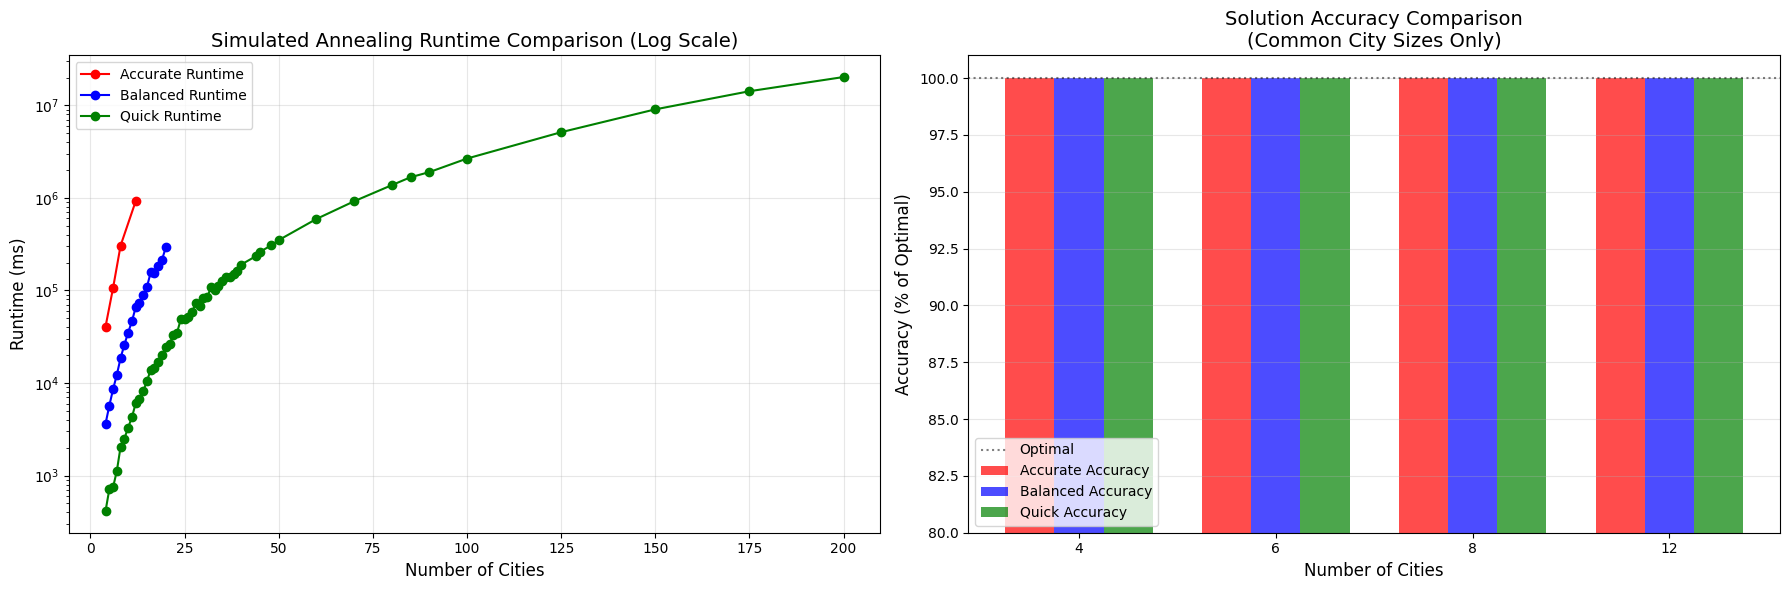

In [24]:
held_karp_file = "held_karp_results.csv"
sa_files = {
    'Accurate': ("sa_results.csv", 'red'),
    'Balanced': ("sa_balanced_results.csv", 'blue'),
    'Quick': ("sa_quick_results.csv", 'green')
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# --- Graph 1: Runtime Comparison ---
for label, (file, color) in sa_files.items():
    if os.path.exists(file):
        df = pd.read_csv(file).sort_values('cities')
        ax1.plot(df['cities'], df['runtime_ms'], 
                marker='o', linestyle='-', color=color,
                label=f'{label} Runtime')
        
ax1.set_title('Simulated Annealing Runtime Comparison (Log Scale)', fontsize=14)
ax1.set_xlabel('Number of Cities', fontsize=12)
ax1.set_ylabel('Runtime (ms)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# --- Graph 2: Accuracy Comparison ---
if os.path.exists(held_karp_file):
    hk_df = pd.read_csv(held_karp_file).sort_values('cities')
    
    common_cities = set(hk_df['cities'])
    for file, _ in sa_files.values():
        if os.path.exists(file):
            df = pd.read_csv(file)
            common_cities = common_cities.intersection(set(df['cities']))
    common_cities = sorted(common_cities)
    
    if common_cities:
        bar_width = 0.25
        x = np.arange(len(common_cities))
        
        for i, (label, (file, color)) in enumerate(sa_files.items()):
            if os.path.exists(file):
                sa_df = pd.read_csv(file)
                merged = pd.merge(sa_df[sa_df['cities'].isin(common_cities)], 
                                hk_df[hk_df['cities'].isin(common_cities)],
                                on='cities', suffixes=('_sa', '_hk'))
                merged['accuracy_pct'] = (merged['distance_hk'] / merged['distance_sa']) * 100
                
                ax2.bar(x + i*bar_width, merged['accuracy_pct'],
                       width=bar_width, color=color, alpha=0.7,
                       label=f'{label} Accuracy')
        
        ax2.set_xticks(x + bar_width)
        ax2.set_xticklabels(common_cities)
        ax2.axhline(100, color='black', linestyle=':', alpha=0.5, label='Optimal')
        ax2.set_title('Solution Accuracy Comparison\n(Common City Sizes Only)', fontsize=14)
        ax2.set_xlabel('Number of Cities', fontsize=12)
        ax2.set_ylabel('Accuracy (% of Optimal)', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.set_ylim(80, 101)
    else:
        ax2.text(0.5, 0.5, 'No common city sizes found\nacross all result files',
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('No Comparable Data Available', fontsize=14)
else:
    ax2.text(0.5, 0.5, 'Held-Karp results missing\nrequired for accuracy comparison',
            ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Missing Reference Data', fontsize=14)

plt.tight_layout()
plt.show()